In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A=np.array([[1,1,0,1],
           [-1,0,1,1],
           [0,-1,0,-1],
           [1,0,1,0]],dtype=float)
b=np.array([5.2,0.1,1.9,0],dtype=float)
x=np.linalg.solve(A, b)
print("x =", x)

x = [  7.1 -16.2  -7.1  14.3]


In [4]:
p=A @ x.T - b.T
print(p)
r=np.sqrt((x @ x.T)) 
print (r)


[ 8.88178420e-16  1.41553436e-15 -3.10862447e-15 -1.77635684e-15]
23.827505114887707


In [7]:
A_2=np.array([[10 ** (-8),1,0,1],
           [-1,0,1,1],
           [0,-1,0,-1],
           [1,0,1,0]],dtype=float)
x=np.linalg.solve(A_2, b)
print("x =", x)
p=A_2 @ x.T - b.T
r=np.sqrt((p @ p.T)) 
print (r)

x = [ 7.10000004e+08 -1.42000001e+09 -7.10000004e+08  1.42000001e+09]
2.5343532069515723e-07


In [5]:
A_3=np.array([[10 ** (-10),1,0,1],
           [-1,0,1,1],
           [0,-1,0,-1],
           [1,0,1,0]],dtype=float)
x=np.linalg.solve(A, b)
print("x =", x)
p=A @ x.T - b.T
print(p)
r=np.sqrt((x @ x.T)) 
print (r)

x = [  7.1 -16.2  -7.1  14.3]
[ 8.88178420e-16  1.41553436e-15 -3.10862447e-15 -1.77635684e-15]
23.827505114887707


In [6]:
A_3=np.array([[10 ** (-12),1,0,1],
           [-1,0,1,1],
           [0,-1,0,-1],
           [1,0,1,0]],dtype=float)
x=np.linalg.solve(A, b)
print("x =", x)
p=A @ x.T - b.T
print(p)
r=np.sqrt((x @ x.T)) 
print (r)

x = [  7.1 -16.2  -7.1  14.3]
[ 8.88178420e-16  1.41553436e-15 -3.10862447e-15 -1.77635684e-15]
23.827505114887707


In [7]:
def sum_S(N,direction):
    Ps=0
    if direction=="up":
        n=1
        while n<= N:
            Ps=Ps+(2*n+1)/((n**2)*((n+1)**2))
            n=n+1 
    elif direction == "down":
        n=N
        while n>=1:
             Ps+=(2*n+1)/((n**2)*((n+1)**2))
             n=n-1 
    return Ps
print(sum_S(10, 'up'))
print(sum_S(10, 'down'))

0.9917355371900827
0.9917355371900827


[   1000.  112000.  223000.  334000.  445000.  556000.  667000.  778000.
  889000. 1000000.]
0.9999990019970034
[9.98002996e-07 7.97180100e-11 2.01088035e-11 8.96405172e-12
 5.04984943e-12 3.23485683e-12 2.24775754e-12 1.65212288e-12
 1.26532118e-12 9.99977878e-13]
[ 5.55111512e-02  9.99200722e-01 -1.66755498e+01 -1.59894320e+02
  2.31525910e+02  4.13025170e+02  5.11735099e+02  5.71298564e+02
  6.09978734e+02  6.36513064e+02]


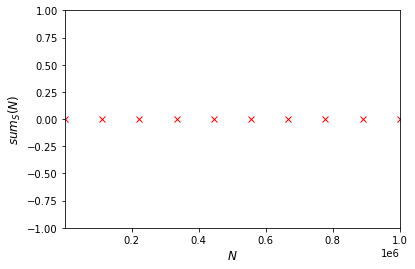

In [8]:
x = np.linspace(10**3, 10**6, 10)
print(x)
print(sum_S(x[0],"up"))
y=np.array([1-sum_S(x[0],"up"),1-sum_S(x[1],"up"),1-sum_S(x[2],"up"),1-sum_S(x[3],"up"),1-sum_S(x[4],"up"),1-sum_S(x[5],"up"),1-sum_S(x[6],"up"),1-sum_S(x[7],"up"),1-sum_S(x[8],"up"),1-sum_S(x[9],"up")])

fig, ax = plt.subplots()
ax.set_xlabel(r"$N$", fontsize=12)
ax.set_ylabel(r"$sum_S \left( N \right)$", fontsize=12)
ax.set_xlim([10**3,10**6])
ax.set_ylim([-1, 1])

ax.plot(x, y,"rx")

# Compute the summation function


# Define and Compare to the closed-form
def cfSum_S(N):
    s=1-(1/((N+1)**2))
    return s

yexact=np.array([1-cfSum_S(x[0]),1-cfSum_S(x[1]),1-cfSum_S(x[2]),1-cfSum_S(x[3]),1-cfSum_S(x[4]),1-cfSum_S(x[5]),1-cfSum_S(x[6]),1-cfSum_S(x[7]),1-cfSum_S(x[8]),1-cfSum_S(x[9])])

print(yexact)

Sum_error = 100000000000000*np.array([cfSum_S(x[0])-sum_S(x[0],"up"),cfSum_S(x[1])-sum_S(x[1],"up"),cfSum_S(x[2])-sum_S(x[2],"up"),cfSum_S(x[3])-sum_S(x[3],"up"),cfSum_S(x[4])-sum_S(x[4],"up"),cfSum_S(x[5])-sum_S(x[5],"up"),cfSum_S(x[6])-sum_S(x[6],"up"),cfSum_S(x[7])-sum_S(x[7],"up"),cfSum_S(x[8])-sum_S(x[8],"up"),cfSum_S(x[9])-sum_S(x[9],"up")])

print(Sum_error)

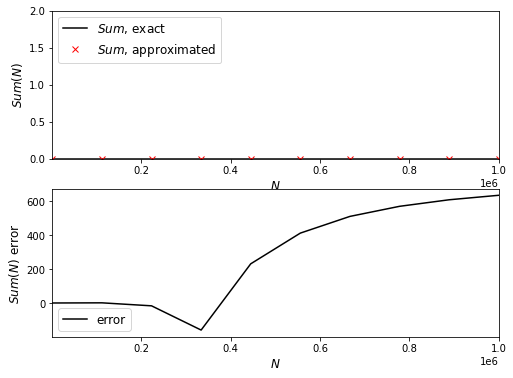

In [9]:
# Plot the derivative, approximation, and error
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(x, yexact, "k-", label=r"$Sum$, exact")
ax[0].plot(x, y, "rx", label=r"$Sum$, approximated")
ax[0].set_xlim([x[0], x[-1]])
ax[0].set_ylim([0, 2])
ax[0].set_xlabel(r"$N$", fontsize=12)
ax[0].set_ylabel(r"$Sum\left( N \right)$", fontsize=12)
ax[0].legend(loc="upper left", fontsize=12)

ax[1].plot(x, Sum_error, "k-", label="error")
ax[1].set_xlim([x[0], x[-1]])
ax[1].set_xlabel(r"$N$", fontsize=12)
ax[1].set_ylabel(r"$Sum \left( N \right)$ error", fontsize=12)
ax[1].legend(loc="lower left", fontsize=12)

plt.show()

In [10]:
def quadrature(f,k, xk, wk, a, b):
    # Define the shifted and scaled nodes
    yk = (b - a)/2 * (xk + 1) + a
    # Compute the weighted sum
    I_approx = (b - a)/2 * np.sum(wk * f(yk,k))
    return I_approx

def Simpson(f,k, a, b, M):
    '''
    Returns the approximation of the integral of f
    over [a, b], using the composite trapezoid rule
    with M equal-width partitions.
    '''
    # Find each sub-interval
    bounds = np.linspace(a, b, M+1)
    
    # Define weights and nodes for trapezoid rule
    xk = np.array([-1,0,1])
    wk = np.array([1/3,4/3,1/3])
    
    # Loop to compute each small integral
    I_approx = 0
    for i in range(M):
        I_approx += quadrature(f,k, xk, wk, bounds[i], bounds[i+1])
    
    return I_approx

In [11]:
def I(x,k):
    Ix=(x**4)*np.cos(k*x)
    return Ix
def simpson_I(k,N):
    simpsonI=Simpson(I,k,0,2*np.pi,N)
    return simpsonI
def exactI(k):
    eI=32*(np.pi**3)/(k**2) - (48*np.pi)/(k**4)
    return eI

In [12]:
print (simpson_I(1,5))
print (exactI(1))
def errow(k,N):
    e=exactI(k)-simpson_I(k,N)
    return e
print (errow(1,5))

n=3
epsilon=10**(-n)
N=5
while errow(1,N)>=epsilon:
    N=N+1
print(N)
print(errow(1,N))

838.8146240307599
841.404406397284
2.589782366524105
36
0.000911465822127866


In [13]:
def F(x):
    return np.cos(x) 
def dF(x):
    return -np.sin(x)


h = np.logspace(10**(-16), 10**(-1), num=50)
x=1
F_derivative_forward = (F(x + h) - F(x)) / h
F_derivative_backward = (F(x-h)-F(x))/h
F_derivative_centred = (F(x+h)-F(x-h)/h)
print (f"forward:{F_derivative_forward}")
print (f"backward:{F_derivative_backward}")
print (f"centred:{F_derivative_centred}")
Derivative_Error=abs(dF(x)-F_derivative_forward)
print(dF(x)-F_derivative_forward)


forward:[-0.95644914 -0.95622348 -0.95598957 -0.95574731 -0.9554966  -0.95523733
 -0.95496942 -0.95469274 -0.9544072  -0.95411269 -0.9538091  -0.95349633
 -0.95317426 -0.95284279 -0.95250181 -0.95215121 -0.95179086 -0.95142067
 -0.95104052 -0.95065029 -0.95024987 -0.94983913 -0.94941797 -0.94898626
 -0.94854389 -0.94809072 -0.94762666 -0.94715156 -0.94666531 -0.94616778
 -0.94565885 -0.94513839 -0.94460628 -0.94406238 -0.94350657 -0.94293873
 -0.94235871 -0.94176639 -0.94116163 -0.9405443  -0.93991427 -0.93927141
 -0.93861557 -0.93794662 -0.93726441 -0.93656883 -0.93585971 -0.93513693
 -0.93440033 -0.93364978]
backward:[0.45969769 0.45753153 0.45535339 0.45316322 0.45096098 0.44874662
 0.44652009 0.44428135 0.44203035 0.43976705 0.4374914  0.43520335
 0.43290286 0.43058989 0.42826439 0.42592632 0.42357563 0.42121229
 0.41883625 0.41644746 0.41404589 0.41163149 0.40920423 0.40676407
 0.40431096 0.40184486 0.39936574 0.39687356 0.39436828 0.39184987
 0.38931829 0.38677349 0.38421546 0.38

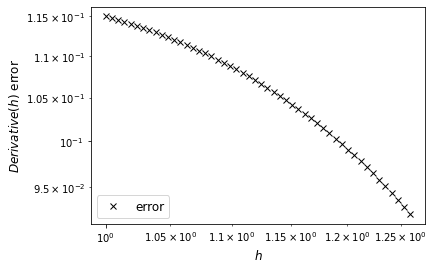

In [16]:
fig, ax = plt.subplots()

plt.loglog(h, Derivative_Error, "kx", label="error")
#ax.set_xlim([h[0], h[-1]])
ax.set_xlabel(r"$h$", fontsize=12)
ax.set_ylabel(r"$Derivative \left( h \right)$ error", fontsize=12)
ax.legend(loc="lower left", fontsize=12)
plt.show()